# Part 2 : Logistic Regression

### ADD YOUR ACADEMIC INTERGITY STATEMENT HERE AS A COMMENT BLOCK BELOW. CHECK IMPORTANT NOTE FOR MORE DETAILS.

'''I certify that the code and data in this assignment were generated independently, using only tools and resources 
    defined in the course and that I did not receieve any external help, coaching or contributions during the production of this work '''

# END OF YOUR ACADEMIC INTERGITY STATEMENT

### 1. Import required libraries (not allowed: sklearn or any other libraries with in-built functions that help to implement ML)

In [40]:
#1 importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Read, preprocess and print main statistic about the dataset (your code from Part I can be reused).

In [41]:
#reading, preprocessing and printing main statistic of the data set
df = pd.read_csv('penguins.csv')

In [42]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [44]:
print(df.shape)

(344, 8)


In [45]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [46]:
print('Correlation:')
df.corr()

Correlation:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


In [47]:
# total missing values
mis_val = df.isnull().sum()
print(mis_val)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [48]:
# dropping rows with null values
df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [49]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [50]:
# main statistics 
df.describe( include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


### 3. Convert features with string datatype to categorical (species,island,sex)

In [51]:
#string to categorical
df['species'] = df.species.astype('category')
df['island'] = df.island.astype('category')
df['sex'] = df.sex.astype('category')


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
 7   year               344 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 14.9 KB


### 4.Normalizenon-categoricalfeatures(culmen_length_mm,culmen_depth_mm, flipper_length_mm, body_mass_g)
### a. Find the min and max values for each column
### b. Rescale dataset columns to the range from 0 to 1

In [53]:
#4a: Finding min, max and normalizing data

#Bill length
a=df['bill_length_mm'].max(axis=0)
b=df['bill_length_mm'].min(axis=0)
c=df['bill_length_mm']
print(a)
print(b)

#Normalization of non-categorical value
Bill_len = (c-b)/(a-b)
print(Bill_len)

59.6
32.1
0      0.254545
1      0.269091
2      0.298182
3           NaN
4      0.167273
         ...   
339    0.861818
340    0.414545
341    0.636364
342    0.680000
343    0.658182
Name: bill_length_mm, Length: 344, dtype: float64


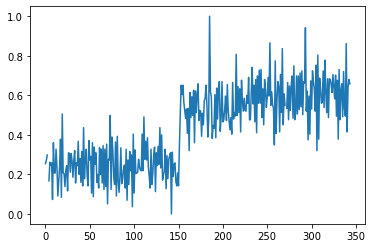

In [54]:
plt.plot(Bill_len)

In [55]:
#Bill Depth
a=df['bill_depth_mm'].max(axis=0)
b=df['bill_depth_mm'].min(axis=0)
c=df['bill_depth_mm']

print(a)
print(b)

#Normalization of non-categorical value
Bill_depth = (c-b)/(a-b)
print(Bill_depth)

21.5
13.1
0      0.666667
1      0.511905
2      0.583333
3           NaN
4      0.738095
         ...   
339    0.797619
340    0.595238
341    0.607143
342    0.702381
343    0.666667
Name: bill_depth_mm, Length: 344, dtype: float64


In [56]:
#Flipper length
a=df['flipper_length_mm'].max(axis=0)
b=df['flipper_length_mm'].min(axis=0)
c=df['flipper_length_mm']

print(a)
print(b)

#Normalization of non-categorical value
Fipper_Len = (c-b)/(a-b)
print(Fipper_Len)

231.0
172.0
0      0.152542
1      0.237288
2      0.389831
3           NaN
4      0.355932
         ...   
339    0.593220
340    0.508475
341    0.355932
342    0.644068
343    0.440678
Name: flipper_length_mm, Length: 344, dtype: float64


In [57]:
#Body Mass (g)
a=df['body_mass_g'].max(axis=0)
b=df['body_mass_g'].min(axis=0)
c=df['body_mass_g']

print(a)
print(b)

#Normalization of non-categorical value
Body_Mass = (c-b)/(a-b)
print(Body_Mass)

6300.0
2700.0
0      0.291667
1      0.305556
2      0.152778
3           NaN
4      0.208333
         ...   
339    0.361111
340    0.194444
341    0.298611
342    0.388889
343    0.298611
Name: body_mass_g, Length: 344, dtype: float64


In [58]:
#print(len(df['sex']))
for a in range(len(df['sex'])):
   # if(df['sex'][a]== 'male'):
    if a == 'male':
     #   df['sex'][a] = 0
        a = 0
    else:
       # df['sex'][a] = 1
        a = 1
    

In [59]:
df['sex'].replace(('male', 'female'), (1, 0), inplace = True)

result_sigmoid = sigmoid(a)
print(result_sigmoid)

### 5. Choose your target Y. For this dataset, there is a number of options:
### a. We can use binary classifier to predict which gender a penguin belongs to (female or male). In this case column sex can be used as Y (target)
### b. We can use binary classifier to predict if a penguin location is  Adélie island or not. In this case column island can be used as Y (target)

In [60]:
# 5a 
#y_pred = df['sex']


In [61]:
# 6 Converting df to N x d matrix 
#  matrix
ip_mat = df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].to_numpy()
ip_mat.view()


array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  49.6,   18.2,  193. , 3775. ],
       [  50.8,   19. ,  210. , 4100. ],
       [  50.2,   18.7,  198. , 3775. ]])

In [62]:
# output column matrix
op_mat = df[['sex']].to_numpy()
op_mat.view()

array([[ 1.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [nan],
       [nan],
       [nan],
       [nan],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [nan],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
      

X_train, X_test, y_train, y_test = ip_mat,op_mat(, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [63]:
# 7 Dividing data into training and test
X_train = df.sample(frac=0.8)
#ip_x = df
#print(ip_x.shape)
#target_y = df['sex']
#print(target_y.shape)
y_train = df['sex'].sample(frac=0.8)

In [64]:
#X_train = ip_x.sample(frac=0.8, random_state=25)
#y_train = target_y.sample(frac=0.8, random_state=25)
print(X_train.shape)
print(y_train.shape)

(275, 8)
(275,)


In [65]:
X_test = df.drop(X_train.index)
y_test = df['sex'].drop(y_train.index)
print(X_test.shape)
print(y_test.shape)

(69, 8)
(69,)


# 9. Recommended structure of your code to define logistic regression:

class LogitRegression():
     def __init__(learning_rate, number_of_iterations):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        learning_rate = 1e-6
        number_of_iterations = 10000

       
def fit(X,y):
        # This method performs the training.
        # Initialize weights
        # For a number of iterations
              # Call gradient_descent function
              # Call cost function and keep it in an array , e.g.
            model.fit(X_train, y_train)
            loss.append()


def cost(y_pred,y):
        # Loss function for Logistic Regression can be defined as
#h = σ(𝑤𝑇𝑥 + 𝑏) = ( 1 ) 1 + 𝑒−(𝑤𝑇𝑥+𝑏)
#𝐽(𝑤)= 1(−𝑦∗log(h)−(1−𝑦)∗log(1−h) 𝑁
        #h = 1 + exp(-(y_h))
        loss = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
        return loss
        #return np.mean(pow((y_pred — y),2))

In [66]:
X_train, y_train 
X_test, y_test 

(       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 3       Adelie  Torgersen             NaN            NaN                NaN   
 9       Adelie  Torgersen            42.0           20.2              190.0   
 14      Adelie  Torgersen            34.6           21.1              198.0   
 15      Adelie  Torgersen            36.6           17.8              185.0   
 16      Adelie  Torgersen            38.7           19.0              195.0   
 ..         ...        ...             ...            ...                ...   
 328  Chinstrap      Dream            45.7           17.3              193.0   
 334  Chinstrap      Dream            50.2           18.8              202.0   
 336  Chinstrap      Dream            51.9           19.5              206.0   
 337  Chinstrap      Dream            46.8           16.5              189.0   
 343  Chinstrap      Dream            50.2           18.7              198.0   
 
      body_mass_g  sex  year  
 3     

In [67]:
np.dot(a, b, out=None)

2700.0

In [68]:
# y_pred = result_sigmoid
# loss = cost(y_pred, y_train)
# gradient_W = np.dot((y_pred-y_train).T, X_train)/X_train.shape[0]

## 10.Train the model:
### a. Define a model by calling Logistic Regression class and passing hyperparameters, e.g. model = LogitRegression(learning_rate, iterations)

In [69]:
class LogitRegression:
    def __init__(self, learning_rate,n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            y_predicted =  1 /(1 + 1 / np.exp(np.dot(X, self.weights) + self.bias))
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            cost = (-1/n_samples) * (np.sum(np.multiply(np.log(y_predicted), y) + np.multiply(np.log(1-y_predicted), (1-y))))
            self.costs.append(cost)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = 1 /(1 + 1 / np.exp(linear_model))
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [70]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,1.0,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,0.0,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,1.0,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,1.0,2009


In [71]:
df.dropna(subset=['sex'],inplace=True)

In [72]:
# Continuous columns
cont = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
cont = (cont - cont.mean())/cont.std()
cont = pd.DataFrame(cont)

# Target
target = df[['sex']]

df = pd.concat([cont,target],axis = 1)

In [73]:
df.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [74]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
#df = df.drop(columns = ['species','island','year'])
n_rows = df.shape[0]
split_index = int(n_rows * 0.8)

train = df.iloc[0:split_index]
test = df.iloc[split_index+1:n_rows-1]


X_train = train[train.columns.drop('sex')].to_numpy()
y_train = train['sex'].to_numpy()

X_test = test[test.columns.drop('sex')].to_numpy()
y_test = test['sex'].to_numpy()

In [105]:
regressor = LogitRegression(learning_rate=0.00002, n_iters=100000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.8615384615384616


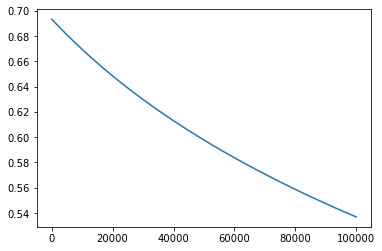

In [106]:
plt.plot(regressor.costs)
plt.show()

In [107]:
regressor.weights

array([0.20566276, 0.3650906 , 0.12746601, 0.33251341])

In [108]:
regressor.bias

0.015392129222370293